In [1]:
from numpy import load
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import fsolve
import math

# Courville et al. 2025, Thermal model analysis and figures for

# Ferrovolcanic intrusions on asteroid (16) Psyche may be magnetized

## Scenario 1

In [2]:
## Plotting parameters 

font = {'family' : 'times',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [3]:
## Functions, see Courville et al., 2025


# Equation 3
def intrusionHeight(rhoMantle,sulfur,T):
    rhoFeS = coreDen(sulfur)
    rhoFE = 7500
    H = T*(rhoFE-rhoFeS)/(rhoFeS-rhoMantle)
    return H
    
    
# Equation 4    
def coreDen(sulfur):
    mS = 32.065
    mFe = 55.845
    wt = sulfur/100
    X = -mFe*wt/(((wt - 1)*mS - mFe*wt))
    den = 6950-5176*X-3108*X**2
    return den




## Equations 5 and 6
def left149(l2):
    return np.exp(-l2**2)/(l2*(1+math.erf(l2)))

def f_to_solve(l2,*offset):
    return left149(l2)-offset[0]

def dikeFreezingTime(width,Tm,T0,rho,c,k,L):
    b=width   # m
    kappa=k/rho/c
    
    left=L*np.sqrt(np.pi)/(c*(Tm-T0))
    
    lambda2=fsolve(f_to_solve,0.5,args=left)
    
    ts = b**2/(4*kappa*lambda2**2) # seconds
    tmy = ts/60/60/24/365/1e6 # million years
    return tmy



# helper functions
def moving_average(data, window_size):
    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    pad_size = (window_size - 1) // 2
    padded_moving_avg = np.pad(moving_avg, (pad_size, pad_size), mode='constant', constant_values=np.nan)
    return padded_moving_avg

def find_closest_index(array, value):
    """
    Find the index of the closest value in the array to the given input value.

    Parameters:
    array (np.array): The array in which to find the closest value.
    value (float): The value to which the closest value in the array is sought.

    Returns:
    int: The index of the closest value in the array.
    """
    array = np.asarray(array)
    index = (np.abs(array - value)).argmin()
    return index

In [4]:
## Load model data

direc="/Users/samuelcourville/Documents/ASU/Psyche/Code/Runs2/"
file="run_2.npz"

rcc=90 # core radius
rhoMH=3500 # mantle density

data = load(direc+file)
lst = data.files
for item in lst:
    print(item)
    if item=="t":
        t=data[item]
    if item=="Ra":
        Ra=data[item]
    if item=="B":
        B=data[item]
    if item=="Tcmb":
        Tcmb=data[item]

Tc
Tc_conv
Tcmb
Tm_mid
Tm_conv
Tm_surf
T_profile
f
Xs
dl
dc
d0
min_unstable
Ur
Ra
RaH
RanoH
Racrit
eta
t
Rem
B
Remav
Bav
buoyr
qcore
Flux


In [5]:
# Load smoothed magnetic field data

direc="/Users/samuelcourville/Documents/ASU/Psyche/Code/Runs2/"
file="run_2_averaged.npz"

data2 = load(direc+file)
lst = data2.files
for item in lst:
    print(item)

Bav
Remav


In [6]:
Tprof=np.reshape(data["T_profile"],(np.size(data["t"]), 241)) # reshape data array

rccm=rcc*1000 # convert km to meters

tMyr=t/60/60/24/365/10**6 # convert Myrs to seconds

# Figure 4c

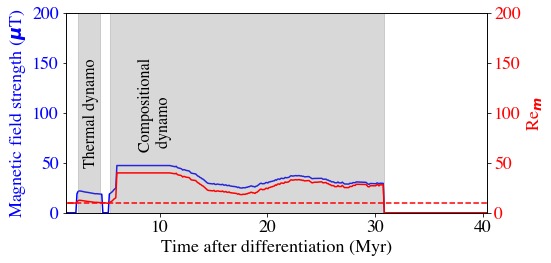

In [7]:
# Figure 4c


fig, ax1 = plt.subplots(figsize=(8,4))


# Plot the first curve
ax1.plot(tMyr, data2["Bav"],'b-', label='sin(x)')
ax1.set_xlabel('Time after differentiation (Myr)')
ax1.set_ylabel("Magnetic field strength ($\mu$T)", color='b')
ax1.tick_params(axis='y', labelcolor='b')
plt.ylim([0,200])

# Create a second y-axis for the second curve
ax2 = ax1.twinx()
ax2.plot(tMyr, data2["Remav"], 'r-', label='exp(0.3x)')
ax2.plot([0,np.max(tMyr)], [10,10], 'r--', label='exp(0.3x)')
ax2.axvspan(5.4, 30.8, alpha=0.3, color='grey')
ax2.axvspan(2.4, 4.5, alpha=0.3, color='grey')
plt.text(2.9, 100, 'Thermal dynamo', rotation=90, fontsize=16, verticalalignment='center')
plt.text(8, 110, 'Compositional \n dynamo', rotation=90, fontsize=16, verticalalignment='center')
ax2.set_ylabel("Re$_m$", color='r')
ax2.tick_params(axis='y', labelcolor='r')
plt.ylim([0,200])
plt.xlim(np.min(tMyr),np.max(tMyr))


# Show the plot
plt.tight_layout()
#plt.savefig('fig4c.pdf') 

In [8]:
def moving_average(data, window_size):
    moving_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
    pad_size = (window_size - 1) // 2
    padded_moving_avg = np.pad(moving_avg, (pad_size, pad_size), mode='constant', constant_values=np.nan)
    return padded_moving_avg

(0.0, 35.0)

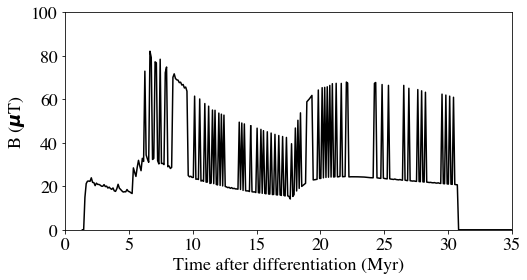

In [9]:
## non-averaged B-field

maB = B
eI=132
B[eI]=maB[eI]
plt.figure(figsize=(8,4))
plt.plot(tMyr[0:eI+1],10**6*maB[0:eI+1],'k')
plt.plot(tMyr[eI:-1],10**6*B[eI:-1],'k')
plt.ylabel("B ($\mu$T)")
plt.xlabel("Time after differentiation (Myr)")
plt.ylim(0,100)
plt.xlim(0,35)

# Figure 4b

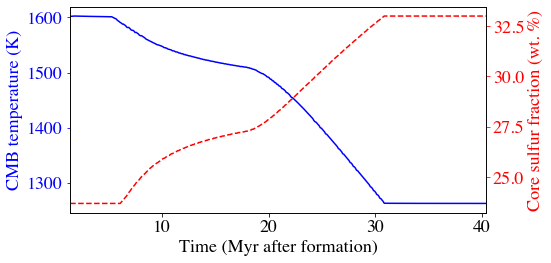

In [10]:
x=tMyr

y1=Tcmb
y2=data["Xs"]


# Create the plot
fig, ax1 = plt.subplots(figsize=(8,4))

# Plot on the first y-axis
ax1.plot(x, y1, 'b-') #, label='sin(x)')
ax1.set_xlabel('Time (Myr after formation)')
ax1.set_ylabel('CMB temperature (K)', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(x, y2, 'r--') #, label='exp(x/10)')
ax2.set_ylabel('Core sulfur fraction (wt. %)', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
fig.tight_layout()  # Adjust layout to prevent overlap
plt.xlim(np.min(tMyr),np.max(tMyr))
plt.tight_layout()

#plt.savefig('fig4b.pdf') 

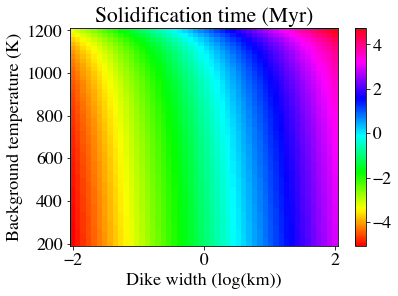

In [11]:
# Plot dike freezing time

# Define the grid size
x = np.linspace(-2, 2, 50) # 10 meters to 100 km
y = np.linspace(200, 1200, 51) # 200 to 1200 K

# Create the grid
X, Y = np.meshgrid(x, y)


Z = np.zeros((51,50))
for i in range(0,50):
    for j in range(0,51):
        Z[j,i] = np.log10(dikeFreezingTime(10**x[i]*1000,1250,y[j],4000,1500,1.0,400000))

# Create the plot
plt.figure()
plt.pcolor(X, Y, Z, shading='auto')
plt.colorbar()  # Add a colorbar
plt.set_cmap("hsv")

# Add labels and title
plt.xlabel('Dike width (log(km))')
plt.ylabel('Background temperature (K)')
plt.title('Solidification time (Myr)')

# Show the plot
plt.show()

In [12]:
# Calculate dike intrusion heights

rc=data["f"]*rccm
hd = intrusionHeight(rhoMH,data["Xs"],rccm-rc*data["f"])
vcT = 4/3*np.pi*rccm**3
vscT= 4/3*np.pi*rccm**3-4/3*np.pi*(rc*data["f"])**3
vlcT= 4/3*np.pi*(rc*data["f"])**3
vdT = 20000*1000*hd
ratVdTVscT=vdT/vscT

# Figure 4a

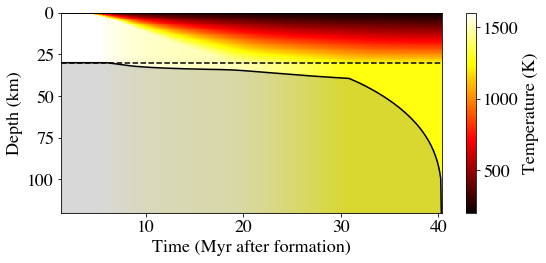

In [13]:
rad=np.linspace(0,120,241)

plt.figure(figsize=(8,4))
plt.pcolor(tMyr,120-rad,np.transpose(Tprof))
cbar=plt.colorbar()
plt.ylim(0,120)
plt.xlim(np.min(tMyr),np.max(tMyr))
dyOn=np.array([int(i != 0) for i in B])
plt.set_cmap("hot")
plt.plot(tMyr,120-rc/1000,'k')
plt.plot(tMyr,rc*0+120-rccm/1000,'--k')
plt.fill_between(tMyr,120-rc/1000, y2=120, color='grey', alpha=0.3)
plt.ylabel("Depth (km)")
plt.xlabel("Time (Myr after formation)")
cbar.set_label("Temperature (K)")
plt.gca().invert_yaxis()
plt.tight_layout()

#plt.savefig('fig4a.pdf') 

In [14]:
nT = len(tMyr)

hgt=np.max(rad)-(rcc+hd/1000)
depth=np.max(rad)-rad

tempP=np.zeros(len(hgt))

for i in range(0,nT):
    j = find_closest_index(depth, hgt[i])
    tempP[i]=Tprof[i,j]

# Figure 5b

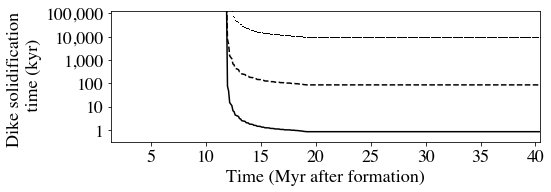

In [15]:
t1 = np.zeros(np.shape(tempP))
t2 = np.zeros(np.shape(tempP))
t3 = np.zeros(np.shape(tempP))
for i in range(0,len(tempP)):
    tmm=1250
    if tempP[i]>1240:
        t1[i]=6
        t2[i]=6
        t3[i]=6
    else:
        t1[i]=np.log10(dikeFreezingTime(0.1*1000,tmm,tempP[i],4000,1500,1.0,400000)*1000)
        t2[i]=np.log10(dikeFreezingTime(1*1000,tmm,tempP[i],4000,1500,1.0,400000)*1000)
        t3[i]=np.log10(dikeFreezingTime(10*1000,tmm,tempP[i],4000,1500,1.0,400000)*1000)
        

fig, ax1 = plt.subplots(figsize=(8,3.0))
ax1.plot(tMyr,t1,'k')
ax1.plot(tMyr,t2,'k--')
ax1.plot(tMyr,t3,'k,')

custom_ticks = [0, 1, 2, 3, 4, 5]
custom_labels = ['1', '10', '100', '1,000', '10,000', '100,000']
ax1.set_yticks(custom_ticks)
ax1.set_yticklabels(custom_labels)
ax1.set_xticks([5,10,15,20,25,30,35,40])

ax1.set_xlabel("Time (Myr after formation)")
ax1.set_ylabel('Dike solidification \n time (kyr)')

plt.ylim(-0.5,5.1)
plt.xlim(np.min(tMyr),np.max(tMyr))
plt.tight_layout()
#plt.savefig('fig5b.pdf') 

# Figure 5a

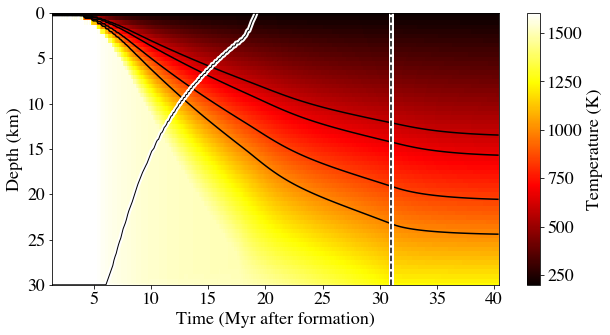

In [16]:
rad=np.linspace(0,120,241)

depth=np.max(rad)-rad

plt.figure(figsize=(10,5))
plt.pcolor(tMyr,depth,np.transpose(Tprof))
plt.ylim(0,30)
plt.xlim(np.min(tMyr),np.max(tMyr))
cbar=plt.colorbar()
plt.set_cmap("hot")
cons=plt.contour(tMyr,depth,np.transpose(Tprof), [600,675,850,1000], colors=('k'))
cbar.set_label("Temperature (K)")
plt.plot(tMyr,np.max(rad)-(rcc+hd/1000),'w',linewidth=5)
plt.plot(tMyr,np.max(rad)-(rcc+hd/1000),'k',linewidth=1)
dyOn=np.array([int(i != 0) for i in B])
plt.plot(tMyr,np.max(rad)-(dyOn*70))
plt.ylabel("Depth (km)")
plt.xlabel("Time (Myr after formation)")
plt.axvline(x=30.94, color='w', linestyle='-',linewidth=5, label="Dynamo end")
plt.axvline(x=31, color='k', linestyle='--', label="Dynamo end")
plt.gca().invert_yaxis()

#plt.savefig('fig5a.pdf') 